# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context = "notebook", style = "darkgrid")

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [6]:
#p(BI|Vanilla)

p_vanilla_I=.75 # chance of containing black balls
p_vanilla_II = 0.5

dist_I = sp.stats.binom(1, p_vanilla_I) ## take out 3 balls from a distribution with previous probability
dist_II = sp.stats.binom(1, p_vanilla_II)



In [9]:
dist_I.pmf(1)

0.75

In [10]:
dist_II.pmf(1)

0.5

In [15]:
#P(A|B) = P((B|A)*P(A)) / P(B)
#A=el bowl 1
#B=vanilla
#p de que es vanilla si viene de bowl 1 = .75
#p de que es vanilla sin importar de dodne viene=  .5*.75+.5*.5= .625
#p de bowl 1 es .5

p_A=.5
p_B=.5*dist_I.pmf(1)+.5*dist_II.pmf(1)
p_BA=.75
P_AB= p_BA*p_A/p_B
print(P_AB)



0.6


What is the probability that it came from Bowl 2?

In [16]:
p_A=.5
p_B=.5*dist_I.pmf(1)+.5*dist_II.pmf(1)
p_BA=.5
P_AB= p_BA*p_A/p_B
print(P_AB)

0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [18]:
p_ch_I=.25 # chance of containing black balls
p_ch_II = 0.5

dist_I = sp.stats.binom(1, p_ch_I) ## take out 3 balls from a distribution with previous probability
dist_II = sp.stats.binom(1, p_ch_II)

In [19]:
p_A=.5
p_B=.5*dist_I.pmf(1)+.5*dist_II.pmf(1)
p_BA=.25
P_AB= p_BA*p_A/p_B
print(P_AB)

0.3333333333333333


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [116]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [117]:
priors=[1/2,1/2]
likelihoods=[.2*.2,.14*.1]

In [126]:
bayes_rule(priors, likelihoods)[0]

0.7407407407407408

P(AB=candy bag1|one yellow one green)
P(A=candy came from bag 1 regardless of color)
P(B=here you make sure it's from one bag and the other)
P(BA= one yellow one green| candu bag1)

In [133]:
p_A=.5
p_B=(.5*(.2*.2))+(.5*(.14*.10))
p_BA=.2*.2

In [134]:
p_AB=(p_A*p_BA)/p_B
p_AB

0.7407407407407408

### ASK ABOUT THE OPTION BELOW:

In [127]:
priors2=[1/4,1/4,1/4,1/4]
likelihoods2=[.2*.2,.2*.1,.14*.1,.14*.2]
bayes_rule(priors2, likelihoods2)

array([0.39215686, 0.19607843, 0.1372549 , 0.2745098 ])

In [124]:
priors3=[1/4,1/4]
likelihoods3=[.2*.2,.14*.1]
bayes_rule(priors3, likelihoods3)


array([0.74074074, 0.25925926])

In [129]:
priors4=[1/2,1]
likelihoods4=[.2*.2,.14*.1]
bayes_rule(priors4, likelihoods4)


array([0.58823529, 0.41176471])

What is the probability that the yellow candy came from Bag 2?

In [109]:
priors2=[1/2,1/2]
likelihoods2=[.2*.2,.14*.1]
bayes_rule(priors2, likelihoods2)[1]

0.25925925925925924

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [111]:
priors3=[1/2,1/2]
likelihoods3=[.1*.14,.2*.2]
bayes_rule(priors3, likelihoods3)[0]

0.25925925925925924

In [112]:
priors3=[1/2,1/2]
likelihoods3=[.1*.14,.2*.2]
bayes_rule(priors3, likelihoods3)[1]

0.7407407407407408

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [114]:
#For Door A

#If the car is actually behind door A, then Monty can open door B or C. 
#So the probability of opening either is 50%.

#FOR P(B) In cases where analyzed events cover all possible options and don’t overlap, 
#we can take the sum of the numerators.

P_A= 1/3
P_BA=1/2
P_B=1/6 + 1/3
P_AB=(P_A*P_BA)/P_B
door_A=P_AB
door_A

0.3333333333333333

In [115]:
#For Door C

#If the car is actually behind door C then monty can only open door B. 
#He cannot open A, the door we picked. 
#He also cannot open door C because it has the car behind it.

#FOR P(B) In cases where analyzed events cover all possible options and don’t overlap, 
#we can take the sum of the numerators.

P_A= 1/3
P_BA=1
P_B=1/6 + 1/3
P_AB=(P_A*P_BA)/P_B
door_C=P_AB
door_C

0.6666666666666666

### I would have said P(B) is one third, why do you add?

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

<AxesSubplot:ylabel='Count'>

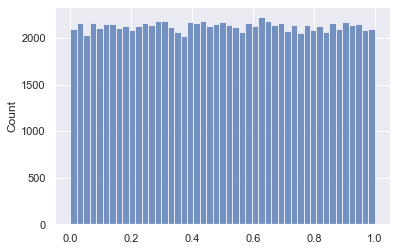

In [85]:
n_draws = 100000
prior = np.random.uniform(0, 1, size=n_draws) ## uniform: no idea about something
sns.histplot(prior)


In [87]:
def generative_model(n, p): ## sampling function: creates random samples from prior distribution and generates observable date
    result = np.random.binomial(n, p)
    return result


In [89]:
observed = (100, 14)
sim_data = list()
for p in prior:
    sim_data.append(generative_model(observed[0], p))

(array([ 11.,  43., 116., 233., 228., 192.,  97.,  49.,  23.,   8.]),
 array([0.05762433, 0.07765001, 0.0976757 , 0.11770138, 0.13772706,
        0.15775275, 0.17777843, 0.19780412, 0.2178298 , 0.23785548,
        0.25788117]),
 <BarContainer object of 10 artists>)

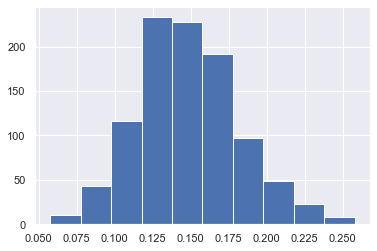

In [90]:
posterior = prior[list(map(lambda x: x == observed[1], sim_data))]
plt.hist(posterior)

Produce a set of descriptive statistics for the posterior distribution.

In [91]:
q05, med, q95 = np.round(np.quantile(posterior, [0.05, 0.5, 0.95]), 2)
vals, counts = np.unique(np.round(posterior, 2), return_counts=True)
mode_value = vals[np.argwhere(counts == np.max(counts)).flatten()]


What is the 90% credible interval range?

In [92]:
print(f"Q05: {q05} - Med.: {med} - Q95: {q95}")

Q05: 0.1 - Med.: 0.15 - Q95: 0.21


What is the Maximum Likelihood Estimate?

In [93]:
print(f"MLE: {mode_value}")

MLE: [0.13]
